# A/B testing for two campaigns



## PROBLEM  




 Two campaigns were performed by a company:

 1) Control Campaign

 2) Test Campaign

 Perform A/B testing to find the best campaign for the company to get more customers.

 Importing the necessary python libraries and dataset and getting a glimpse of the dataset.
 
 

## INDEX



 1) Exploratory Data Analysis: Import Libraries, Load Data, Clean Data, Visualization  
 
 2) Test whether the new campaign has brought significant changes in customer behavior using       appropriate statistical tests   
 
 3) Conclusions  
 

### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind


control_data = pd.read_csv('control_group.csv', sep = ';')
test_data = pd.read_csv('test_group.csv', sep = ';')

In [2]:
print(control_data.shape)
print(test_data.shape)

(30, 10)
(30, 10)


In [3]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


### Clean Data  

Check if there are missing values in the dataset. I removed the row with missing values in both dataframes, and I changed the column names to make them more readable.


In [5]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [6]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64


In [7]:
print(test_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


In [8]:
control_data = control_data.drop(4)
test_data = test_data.drop(4)

In [9]:
print(control_data.isnull().sum())

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64


### Visualization  

I created a function that generates two box plots to compare the distributions of each variable in the two dataframes.

In [10]:


def compare_variable_distributions(data1, data2, variable):
    group1_var = data1[variable]
    group2_var = data2[variable]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=[group1_var, group2_var], palette=['blue', 'lime'])
    plt.title(f'Distribution of {variable} for Control and Test')
    plt.ylabel('Value')
    plt.xticks([0, 1], ['Control', 'Test'])

    plt.tight_layout()
    plt.show()

    mean_difference_var = group2_var.mean() - group1_var.mean()
    std_error_var = np.sqrt(group1_var.std()**2 / len(group1_var) + group2_var.std()**2 / len(group2_var))




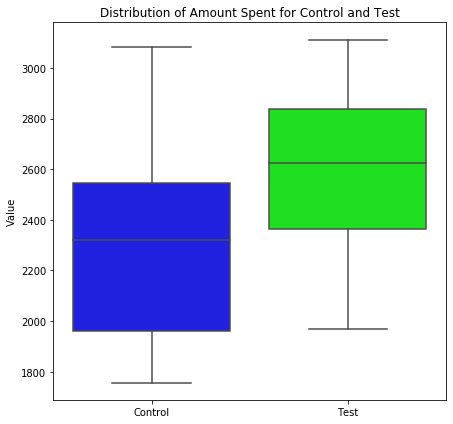

In [11]:
variable = 'Amount Spent'
compare_variable_distributions(control_data, test_data, variable)

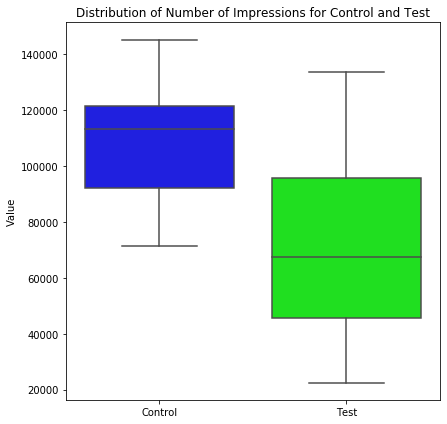

In [12]:
variable = 'Number of Impressions'
compare_variable_distributions(control_data, test_data, variable)

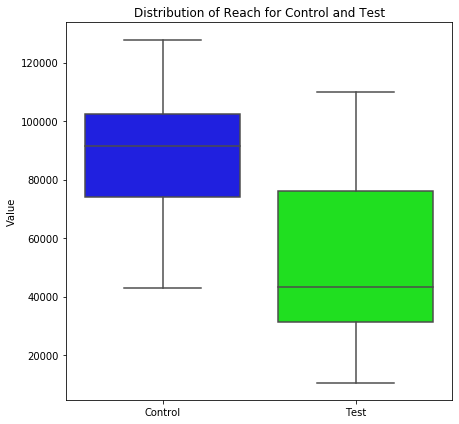

In [13]:
variable = 'Reach'
compare_variable_distributions(control_data, test_data, variable)

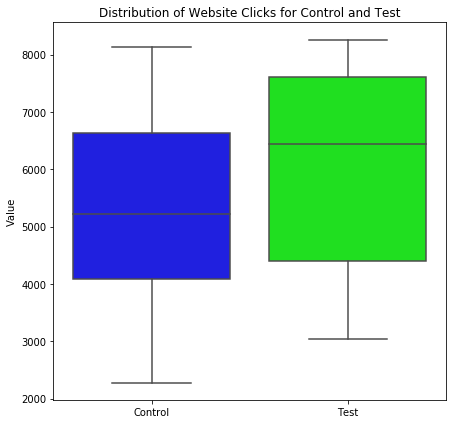

In [14]:
variable = 'Website Clicks'
compare_variable_distributions(control_data, test_data, variable)

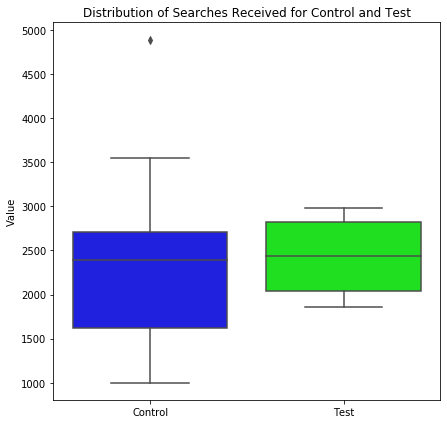

In [15]:
variable = 'Searches Received'
compare_variable_distributions(control_data, test_data, variable)

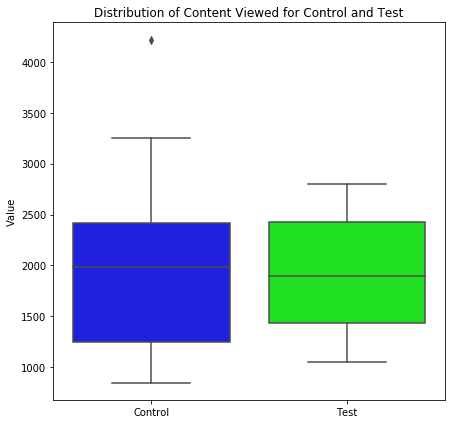

In [16]:
variable = 'Content Viewed'
compare_variable_distributions(control_data, test_data, variable)

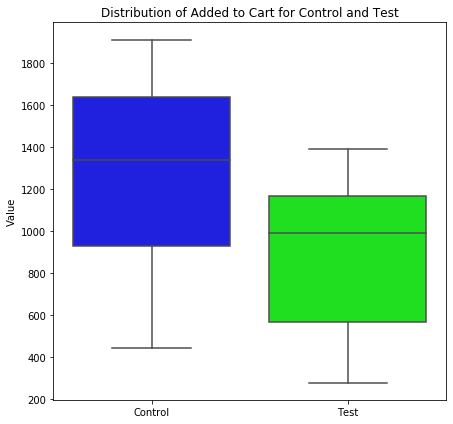

In [17]:
variable = 'Added to Cart'
compare_variable_distributions(control_data, test_data, variable)

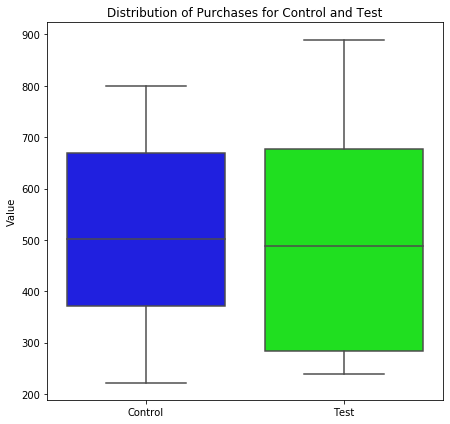

In [18]:
variable = 'Purchases'
compare_variable_distributions(control_data, test_data, variable)

### Test  

I created two functions. The first one generates a graph where histograms of the two compared distributions are represented. The second one is used to choose the most appropriate test to compare the means between the two groups.

In [19]:
def plot_histogram_with_normal_distribution(data1, data2, variable_name):

    # Select the variable "Spend [USD]" from the DataFrames
    variable_control = data1[variable_name]
    variable_test = data2[variable_name]

    # Create a new overlaid plot for both groups
    plt.figure(figsize=(10, 6))
    sns.distplot(variable_control, color='blue', label='Control', kde=True, fit=None)
    sns.distplot(variable_test, color='lime', label='Test', kde=True, fit=None)

    # Calculate the means of both groups
    mean_control = variable_control.mean()
    mean_test = variable_test.mean()

    # Add vertical lines for the means of both groups
    plt.axvline(x=mean_control, color='blue', linestyle='--', label=f'Control Mean: {mean_control:.2f}')
    plt.axvline(x=mean_test, color='lime', linestyle='--', label=f'Test Mean: {mean_test:.2f}')

    # Add labels and title
    plt.xlabel(variable_name)
    plt.ylabel('Density')
    plt.title(f'Overlaid Histogram of {variable_name} for Control and Test Group')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
def compare_mean_differences(group1, group2):
    
    # Shapiro-Wilk test to check the normality of data
    _, p_shapiro1 = shapiro(group1)
    _, p_shapiro2 = shapiro(group2)
    
    # Check if the data follows a normal distribution
    if p_shapiro1 > 0.05 and p_shapiro2 > 0.05:
        normal = True
        print("Group 1 data follows a normal distribution. Shapiro-Wilk p-value:", round(p_shapiro1, 3))
        print("Group 2 data follows a normal distribution. Shapiro-Wilk p-value:", round(p_shapiro2, 3))
    else:
        normal = False
        print("Data does not follow a normal distribution. Shapiro-Wilk p-values:")
        print("Group 1:", round(p_shapiro1, 3))
        print("Group 2:", round(p_shapiro2, 3))
    
    # Levene's test to check the homogeneity of variances
    _, p_levene = levene(group1, group2)
    
    # Check if the variances of the two groups are homogeneous
    if p_levene > 0.05:
        homogenous = True
        print("Variances of the two groups are homogeneous. Levene's p-value:", round(p_levene, 3))
    else:
        homogenous = False
        print("Variances of the two groups are not homogeneous. Levene's p-value:", round(p_levene, 3))
    
    # Perform the statistical test for the difference between means
    if normal and homogenous:
        # If normality and homogeneity are satisfied, perform Student's t-test
        _, p_ttest = ttest_ind(group1, group2)
        result = "t-test", round(p_ttest, 3)
        if p_ttest < 0.05:
            print("Test used:", result[0])
            print("p-value:", result[1])
            print("Conclusion: Reject Null Hypothesis")
        else:
            print("Test used:", result[0])
            print("p-value:", result[1])
            print("Conclusion: Fail to Reject Null Hypothesis")
    else:
        # Otherwise, use Mann-Whitney U test
        _, p_mannwhitney = mannwhitneyu(group1, group2)
        result = "Mann-Whitney U", round(p_mannwhitney, 3)
        if p_mannwhitney < 0.05:
            print("Test used:", result[0])
            print("p-value:", result[1])
            print("Conclusion: Reject Null Hypothesis")
        else:
            print("Test used:", result[0])
            print("p-value:", result[1])
            print("Conclusion: Fail to Reject Null Hypothesis")


### Amount Spent

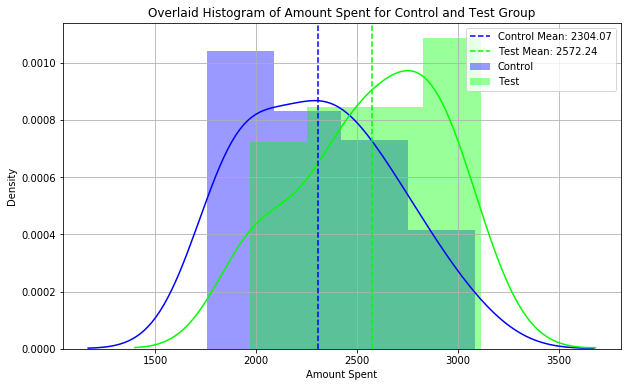

In [21]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Amount Spent')

In [22]:
compare_mean_differences(control_data['Amount Spent'], test_data['Amount Spent'])

Group 1 data follows a normal distribution. Shapiro-Wilk p-value: 0.369
Group 2 data follows a normal distribution. Shapiro-Wilk p-value: 0.088
Variances of the two groups are homogeneous. Levene's p-value: 0.882
Test used: t-test
p-value: 0.006
Conclusion: Reject Null Hypothesis


### Number of Impressions

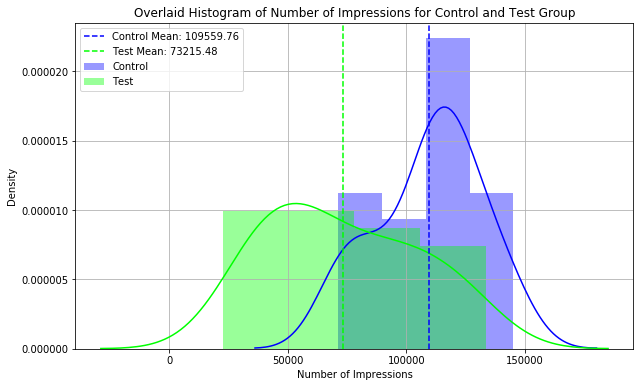

In [23]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Number of Impressions')

In [24]:
compare_mean_differences(control_data['Number of Impressions'], test_data['Number of Impressions'])

Group 1 data follows a normal distribution. Shapiro-Wilk p-value: 0.117
Group 2 data follows a normal distribution. Shapiro-Wilk p-value: 0.184
Variances of the two groups are not homogeneous. Levene's p-value: 0.02
Test used: Mann-Whitney U
p-value: 0.0
Conclusion: Reject Null Hypothesis


### Reach

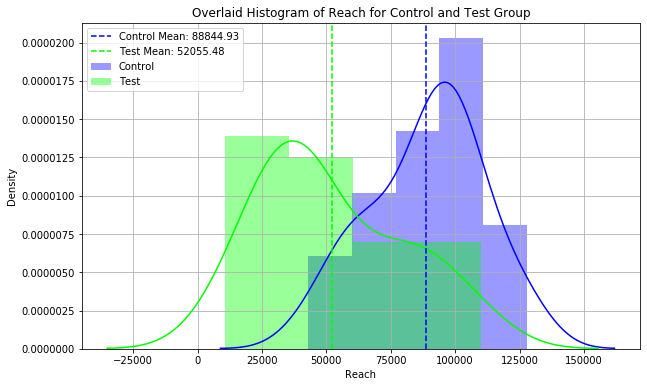

In [25]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Reach')

In [26]:
compare_mean_differences(control_data['Reach'], test_data['Reach'])

Group 1 data follows a normal distribution. Shapiro-Wilk p-value: 0.648
Group 2 data follows a normal distribution. Shapiro-Wilk p-value: 0.066
Variances of the two groups are homogeneous. Levene's p-value: 0.229
Test used: t-test
p-value: 0.0
Conclusion: Reject Null Hypothesis


### Website Clicks

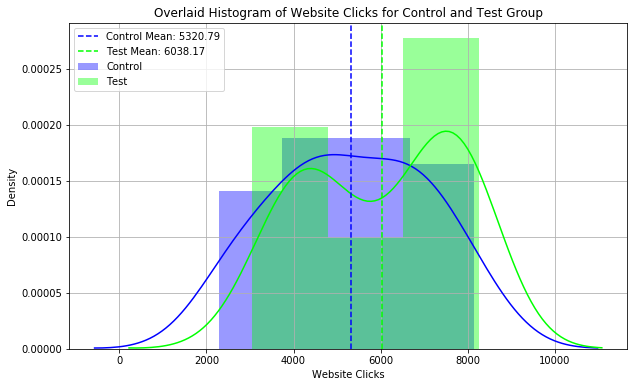

In [27]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Website Clicks')

In [28]:
compare_mean_differences(control_data['Website Clicks'], test_data['Website Clicks'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.304
Group 2: 0.008
Variances of the two groups are homogeneous. Levene's p-value: 0.735
Test used: Mann-Whitney U
p-value: 0.07
Conclusion: Fail to Reject Null Hypothesis


### Searches Received

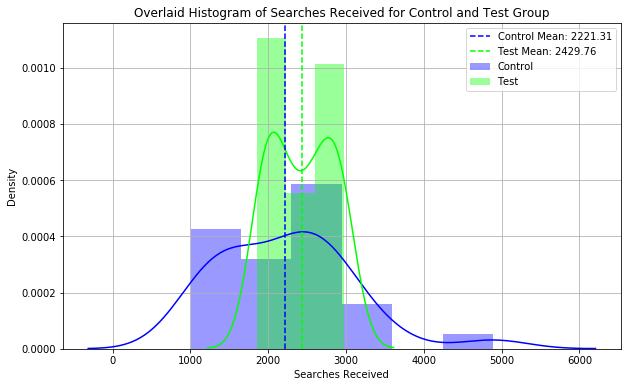

In [29]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Searches Received')

In [30]:
compare_mean_differences(control_data['Searches Received'], test_data['Searches Received'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.05
Group 2: 0.008
Variances of the two groups are not homogeneous. Levene's p-value: 0.005
Test used: Mann-Whitney U
p-value: 0.081
Conclusion: Fail to Reject Null Hypothesis


###  Content Viewed

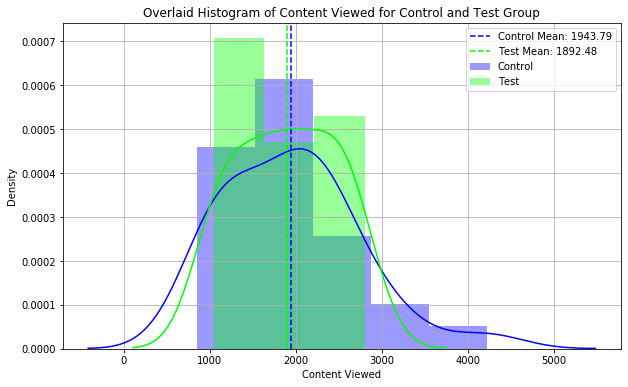

In [31]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Content Viewed')

In [32]:
compare_mean_differences(control_data['Content Viewed'], test_data['Content Viewed'])

Group 1 data follows a normal distribution. Shapiro-Wilk p-value: 0.069
Group 2 data follows a normal distribution. Shapiro-Wilk p-value: 0.06
Variances of the two groups are homogeneous. Levene's p-value: 0.299
Test used: t-test
p-value: 0.776
Conclusion: Fail to Reject Null Hypothesis


### Added to Cart

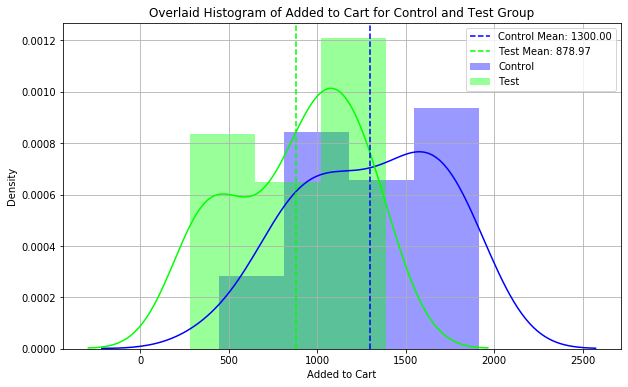

In [33]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Added to Cart')

In [34]:
compare_mean_differences(control_data['Added to Cart'], test_data['Added to Cart'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.252
Group 2: 0.032
Variances of the two groups are homogeneous. Levene's p-value: 0.316
Test used: Mann-Whitney U
p-value: 0.0
Conclusion: Reject Null Hypothesis


### Purchases

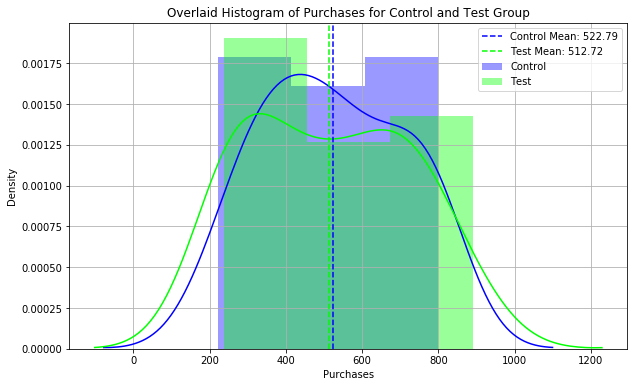

In [35]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Purchases')

In [36]:
compare_mean_differences(control_data['Purchases'], test_data['Purchases'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.09
Group 2: 0.031
Variances of the two groups are homogeneous. Levene's p-value: 0.343
Test used: Mann-Whitney U
p-value: 0.408
Conclusion: Fail to Reject Null Hypothesis


### Cost_per_click

The variable was not present in the initial data; I created it myself.

In [37]:
control_data['Cost_per_click'] = control_data['Amount Spent'] / control_data['Website Clicks']
test_data['Cost_per_click'] = test_data['Amount Spent'] / test_data['Website Clicks']

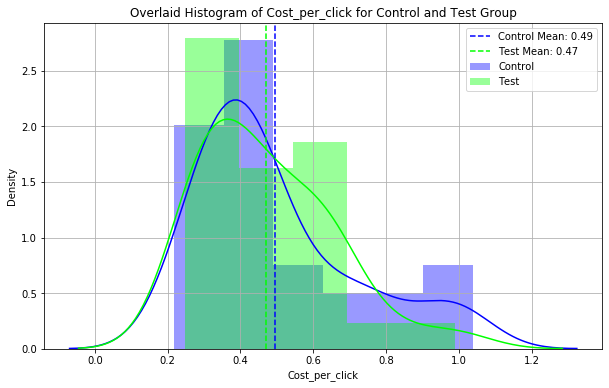

In [40]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Cost_per_click')

In [41]:
compare_mean_differences(control_data['Cost_per_click'], test_data['Cost_per_click'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.003
Group 2: 0.02
Variances of the two groups are homogeneous. Levene's p-value: 0.658
Test used: Mann-Whitney U
p-value: 0.432
Conclusion: Fail to Reject Null Hypothesis


### Cost per purchase  

The variable was not present in the initial data; I created it myself.

In [42]:
control_data['Cost_per_purchase'] = (control_data['Amount Spent'] ) / control_data['Purchases']
test_data['Cost_per_purchase'] = (test_data['Amount Spent'] ) / test_data['Purchases']

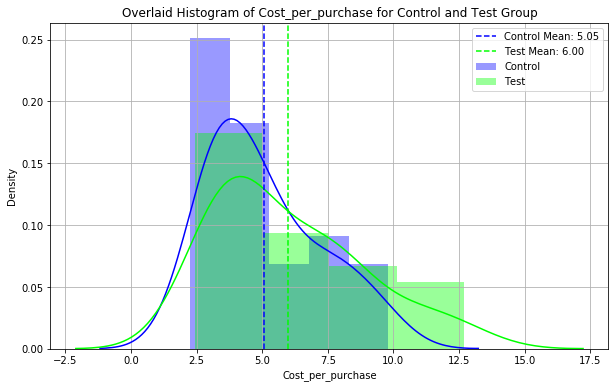

In [43]:
plot_histogram_with_normal_distribution(control_data, test_data, 'Cost_per_purchase')

In [44]:
compare_mean_differences(control_data['Cost_per_purchase'], test_data['Cost_per_purchase'])

Data does not follow a normal distribution. Shapiro-Wilk p-values:
Group 1: 0.021
Group 2: 0.011
Variances of the two groups are homogeneous. Levene's p-value: 0.2
Test used: Mann-Whitney U
p-value: 0.098
Conclusion: Fail to Reject Null Hypothesis


### Summary  



| Variable            | Mean Test | Mean Control | Output Test                                     |
|:--------------------|:---------:|:------------:|:------------------------------------------------|
| Amount Spent        | 2,572     | 2,304        | The test campaign had a statistically higher mean. |
| Number of Impressions | 73,215   | 109,559      | The test campaign had a statistically lower mean |
| Reach               | 52,055    | 88,844       | The test campaign had a statistically lower mean |
| Website Clicks      | 6,038     | 5,320        | The test campaign had a mean statistically neither higher nor lower |
| Searches Received   | 2,429     | 2,221        | The test campaign had a mean statistically neither higher nor lower |
| Content Viewed      | 1,892     | 1,943        | The test campaign had a mean statistically neither higher nor lower |
| Added to Cart       | 878       | 1,300        | The test campaign had a statistically lower mean |
| Purchases           | 512       | 522          | The test campaign had a mean statistically neither higher nor lower |
| Cost_per_click      | .47       | .49          | The test campaign had a mean statistically neither higher nor lower |
| Cost per purchase   | 6         | 5.05         | The test campaign had a mean statistically neither higher nor lower |
